In [44]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

## Blob Overview:
Blob1.Far from each other,high sd

Blob2.Close to each other,low sd

# Blob 1 - 5 blobs, far from each other, higher standard deviation (sd=2)

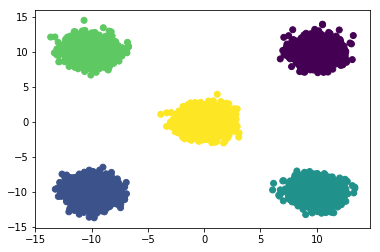

In [76]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[10, 10], [-10, -10], [10, -10],[-10,10],[0,0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    random_state=42)

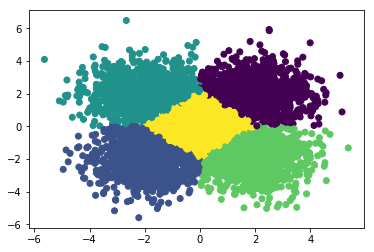

Blob1:
col_0    0    1    2    3    4
row_0                         
0      891    0    9   17   57
1        0  903   25   14   67
2       13   18    0  891   65
3       10   18  910    0   66
4       79   66   59   68  754


In [71]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Blob1:')
print(pd.crosstab(y_pred, y_train))

# Mean-shift

Number of estimated clusters: 5


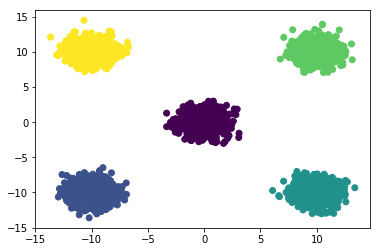

Comparing the assigned categories to the ones in the data:
col_0     0     1     2    3    4
row_0                            
0         0     0     0  993    0
1         0  1005     0    0    0
2         0     0  1003    0    0
3         0     0     0    0  990
4      1009     0     0    0    0


In [77]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


# Spectral clustering

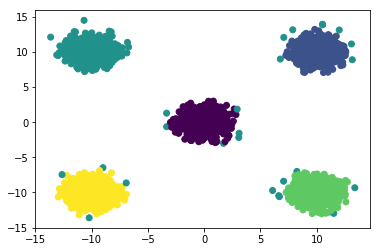

Blob1:
col_0     0    1    2    3     4
row_0                           
0         0  985    8    0     0
1         0    0    4    0  1001
2         0    0    7  996     0
3         0    0  990    0     0
4      1003    0    6    0     0


In [78]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Blob1:')
print(pd.crosstab(y_train,predict))

# Affinity propagation

Done


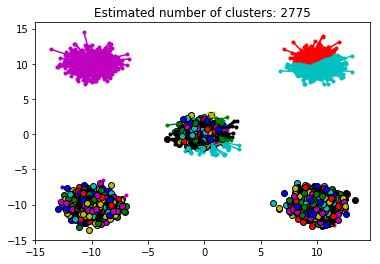

In [79]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_



plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()


Blob 1 classified by 5 blobs, with centroids spread far apart and high standard deviation (sd=2).

K-Means: Performed well

Mean-Shift: Performed well

Spectral Clustering: Performed poorly; data far from each centroid grouped into one cluster.

Affinity Propagation: Performed poorly; identified 2775 clusters

# Blob 2 - 5 blobs, close  to each other, higher standard deviation (sd=1)

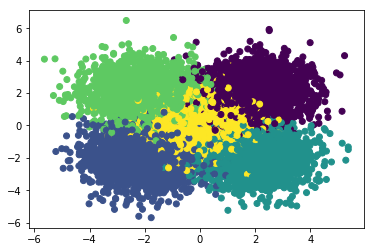

In [72]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2],[-2,2],[0,0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    random_state=42)

# K-means

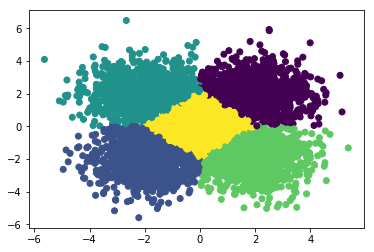

Blob1:
col_0    0    1    2    3    4
row_0                         
0      891    0    9   17   57
1        0  903   25   14   67
2       13   18    0  891   65
3       10   18  910    0   66
4       79   66   59   68  754


In [73]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Blob2:')
print(pd.crosstab(y_pred, y_train))

# Mean-shift

Number of estimated clusters: 1


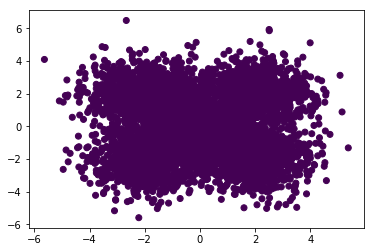

Blob2:
col_0     0
row_0      
0       993
1      1005
2      1003
3       990
4      1009


In [74]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Blob2:')
print(pd.crosstab(y_train,labels))

# Spectral clustering

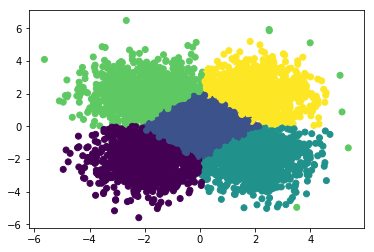

Blob2:
col_0    0    1    2    3    4
row_0                         
0        0   85    9   21  878
1      886   87   15   17    0
2       23   71  899    2    8
3       13   74    0  888   15
4       60  769   62   65   53


In [75]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Blob2:')
print(pd.crosstab(y_train,predict))

# Affinity propagation

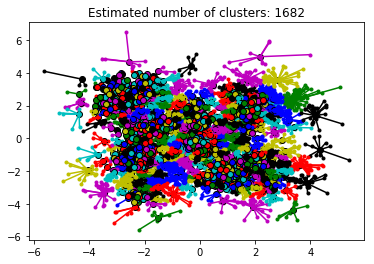

In [66]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_



plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Blob 2 classified by 5 blobs, with centroids close together and lower standard deviation (sd=1).

K-Means: Performed decently. Accurately identified centroids but overall accuracy not great

Mean-Shift: Performed poorly. Only 1 cluster identified.

Spectral Clustering: Performed poorly. Inaccurate clusters identified. Data on outer edge of blobs grouped together
    
Affinity Propagation: Performed very poorly; identified 1682 clusters.



# Conclusion:

In [ ]:
K-means performs well if you know how many clusters you have. Accuracy decreases the closer clusters are to each other.

Mean-Shift performance varies. Performs better if cluster centroids are further away from each other

Spectral clustering performed poorly.Outer edge data of blobs are grouped together

Affinity propagation identified far too many clusters in all scenarios. Performed best with high standard deviation and far-spaced clusters.